In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-data-for-machine-learning/insurance_dataset.csv


## Load the Dataset

In [2]:
data = pd.read_csv('/kaggle/input/insurance-data-for-machine-learning/insurance_dataset.csv')

In [3]:
# Top 5 rows of the dataset
data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [60]:
# Shape of the dataset in form of (Row, columns)
data.shape

(1000000, 12)

In [61]:
# Check for null values
data.isnull().sum()

age                            0
gender                         0
bmi                            0
children                       0
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                     0
coverage_level                 0
charges                        0
dtype: int64

In [3]:
# Two columns values are missing so it will be filled by 'No records'
data['medical_history'] = data['medical_history'].fillna('No records')
data['family_medical_history'] = data['family_medical_history'].fillna('No records')

In [4]:
# Check for null values
data.isnull().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

## Exploratory Data Analysis (EDA)

In [6]:
# Import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


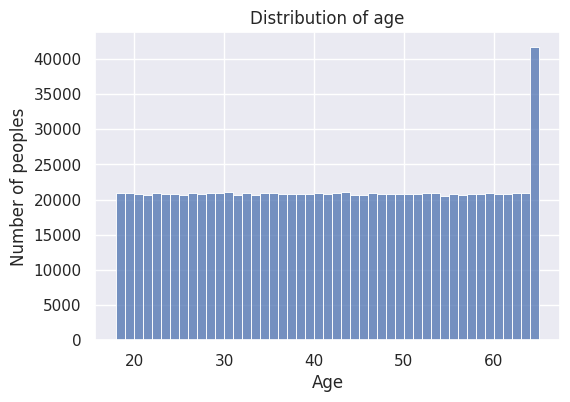

In [65]:
# age
plt.figure(figsize=(6, 4))
sns.histplot(data['age'],bins=47)

plt.xlabel('Age')
plt.ylabel('Number of peoples')
plt.title('Distribution of age')
plt.show()

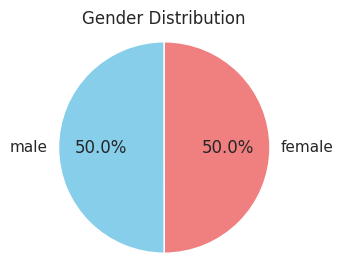

In [66]:
# gender
labels=['male','female']
size=[(data['gender'] == 'male').sum(),(data['gender'] == 'female').sum()]
colors=['skyblue','lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(3, 3))
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


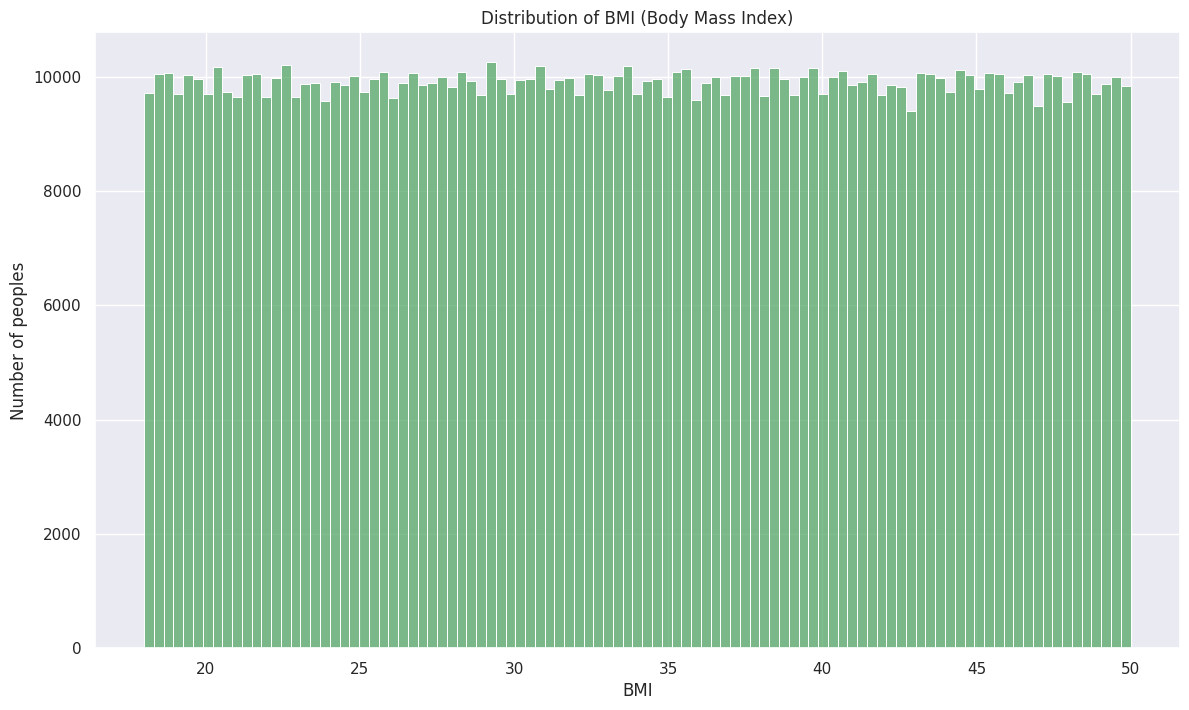

In [67]:
# bmi
sns.histplot(data['bmi'],color='g')

plt.xlabel('BMI')
plt.ylabel('Number of peoples')
plt.title('Distribution of BMI (Body Mass Index)')
plt.show()

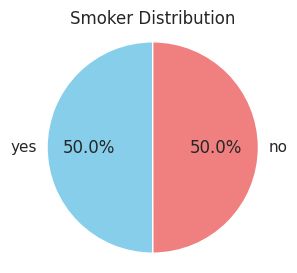

In [68]:
labels=['yes','no']
size=[(data['smoker'] == 'yes').sum(),(data['smoker'] == 'no').sum()]
colors=['skyblue','lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(3, 3))
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Smoker Distribution')
plt.axis('equal')
plt.show()

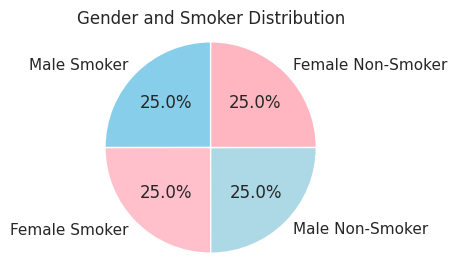

In [69]:
counts = data.groupby(['gender', 'smoker']).size()

labels = ['Male Smoker','Female Smoker','Male Non-Smoker','Female Non-Smoker']

sizes = [
    counts.get(('male', 'yes'), 0),
    counts.get(('female', 'yes'), 0),
    counts.get(('male', 'no'), 0),
    counts.get(('female', 'no'), 0)
]
colors = ['skyblue', 'pink', 'lightblue', 'lightpink']
plt.figure(figsize=(3, 3))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender and Smoker Distribution')
plt.axis('equal')
plt.show()

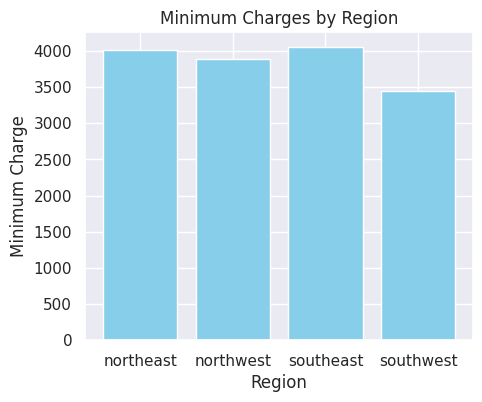

In [70]:
reg=['northeast', 'northwest', 'southeast', 'southwest']
min=[]
min.append(data[data['region'] == 'northeast']['charges'].min())
min.append(data[data['region'] == 'northwest']['charges'].min())
min.append(data[data['region'] == 'southeast']['charges'].min())
min.append(data[data['region'] == 'southwest']['charges'].min())

plt.figure(figsize=(5, 4))
plt.bar(reg, min, color='skyblue')

plt.xlabel('Region')
plt.ylabel('Minimum Charge')
plt.title('Minimum Charges by Region')
plt.show()

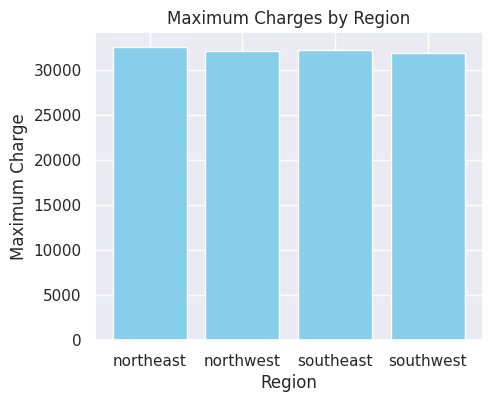

In [71]:
reg=['northeast', 'northwest', 'southeast', 'southwest']
max=[]
max.append(data[data['region'] == 'northeast']['charges'].max())
max.append(data[data['region'] == 'northwest']['charges'].max())
max.append(data[data['region'] == 'southeast']['charges'].max())
max.append(data[data['region'] == 'southwest']['charges'].max())

plt.figure(figsize=(5, 4))
plt.bar(reg, max, color='skyblue')

plt.xlabel('Region')
plt.ylabel('Maximum Charge')
plt.title('Maximum Charges by Region')
plt.show()

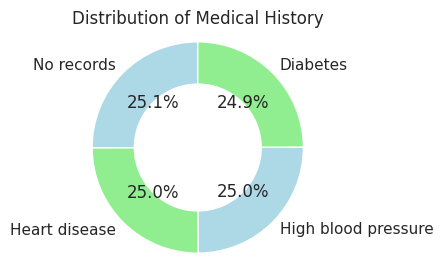

In [72]:
history_counts = data['medical_history'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(history_counts, labels=history_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], wedgeprops=dict(width=0.4))
plt.title('Distribution of Medical History')
plt.axis('equal')
plt.show()

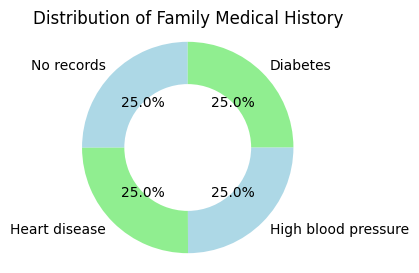

In [7]:
history_counts = data['family_medical_history'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(history_counts, labels=history_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], wedgeprops=dict(width=0.4))
plt.title('Distribution of Family Medical History')
plt.axis('equal')
plt.show()

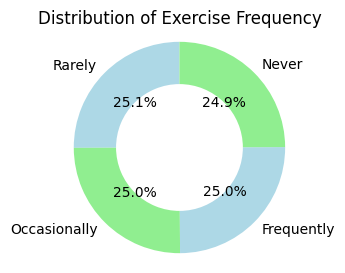

In [9]:
history_counts = data['exercise_frequency'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(history_counts, labels=history_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], wedgeprops=dict(width=0.4))
plt.title('Distribution of Exercise Frequency')
plt.axis('equal')
plt.show()

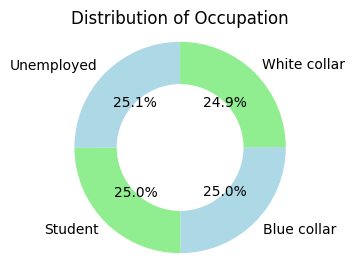

In [10]:
history_counts = data['occupation'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(history_counts, labels=history_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], wedgeprops=dict(width=0.4))
plt.title('Distribution of Occupation')
plt.axis('equal')
plt.show()

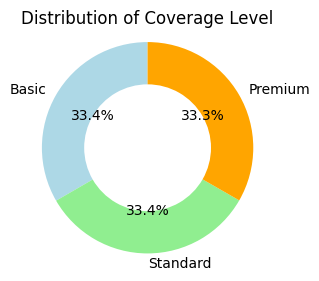

In [11]:
history_counts = data['coverage_level'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(history_counts, labels=history_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen','orange'], wedgeprops=dict(width=0.4))
plt.title('Distribution of Coverage Level')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


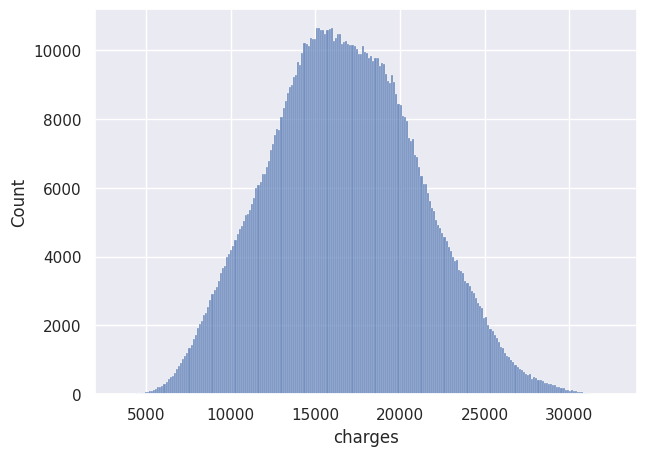

In [77]:
plt.figure(figsize=(7, 5))
sns.histplot(data['charges'])
plt.show()

## Apply LabelEncoder on categorical data

In [4]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
columns = ['gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation', 'coverage_level']

for col in columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

for col in columns:
    print(f"\nMapping for '{col}':")
    for i, class_ in enumerate(encoders[col].classes_):
        print(f"  {class_} → {i}")


Mapping for 'gender':
  female → 0
  male → 1

Mapping for 'smoker':
  no → 0
  yes → 1

Mapping for 'region':
  northeast → 0
  northwest → 1
  southeast → 2
  southwest → 3

Mapping for 'medical_history':
  Diabetes → 0
  Heart disease → 1
  High blood pressure → 2
  No records → 3

Mapping for 'family_medical_history':
  Diabetes → 0
  Heart disease → 1
  High blood pressure → 2
  No records → 3

Mapping for 'exercise_frequency':
  Frequently → 0
  Never → 1
  Occasionally → 2
  Rarely → 3

Mapping for 'occupation':
  Blue collar → 0
  Student → 1
  Unemployed → 2
  White collar → 3

Mapping for 'coverage_level':
  Basic → 0
  Premium → 1
  Standard → 2


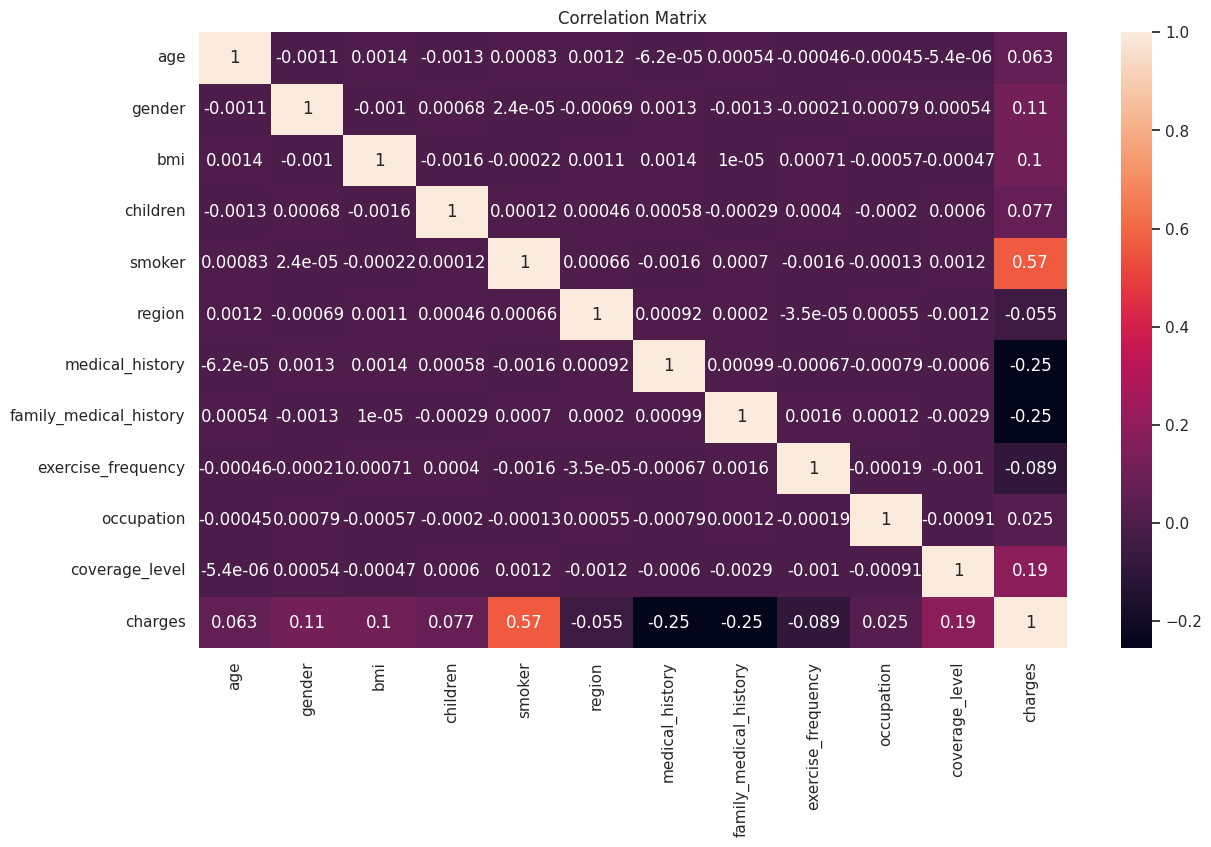

In [107]:
sns.set(rc={'figure.figsize':(14,8)})
sns.heatmap(data.corr(),annot= True)
plt.title('Correlation Matrix')
plt.show()

## Feature Selection

In [6]:
X=data.drop("charges",axis=1)
y=data["charges"]

## Split the Data

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Data Normalization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [111]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

## Train model

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [84]:
# LinearRegression
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train_scaled,y_train)
y_pred=LR.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:",mae)
print("Mean Square Error:",mse)
print("Root Mean Square Error:",rmse)
print("r2_score:",r2)

Mean Absolute Error: 2472.4665104091882
Mean Square Error: 9157484.046080228
Root Mean Square Error: 3026.1335142521766
r2_score: 0.5294375997176282


In [85]:
import pickle
with open("LinearRegression.pkl","wb") as file:
    pickle.dump(LR,file)

In [86]:
# Ridge
from sklearn.linear_model import Ridge
R=Ridge()
R.fit(x_train_scaled,y_train)
y_pred=R.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:",mae)
print("Mean Square Error:",mse)
print("Root Mean Square Error:",rmse)
print("r2_score:",r2)

Mean Absolute Error: 2472.466521363376
Mean Square Error: 9157484.054979686
Root Mean Square Error: 3026.1335157226104
r2_score: 0.5294375992603244


In [87]:
import pickle
with open("Ridge.pkl","wb") as file:
    pickle.dump(R,file)

In [88]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train_scaled,y_train)
y_pred=dtr.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:",mae)
print("Mean Square Error:",mse)
print("Root Mean Square Error:",rmse)
print("r2_score:",r2)

Mean Absolute Error: 408.7391282617129
Mean Square Error: 260186.97611552168
Root Mean Square Error: 510.0852635741614
r2_score: 0.9866301478236766


In [89]:
import pickle
with open("DecisionTreeRegressor.pkl","wb") as file:
    pickle.dump(dtr,file)

In [90]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train_scaled,y_train)
y_pred=rfr.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:",mae)
print("Mean Square Error:",mse)
print("Root Mean Square Error:",rmse)
print("r2_score:",r2)

Mean Absolute Error: 297.89934554610244
Mean Square Error: 131250.44552560762
Root Mean Square Error: 362.2850335379694
r2_score: 0.9932556230102201


In [93]:
import pickle
with open("RandomForest.pkl","wb") as file:
    pickle.dump(rfr,file)

In [94]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:",mae)
print("Mean Square Error:",mse)
print("Root Mean Square Error:",rmse)
print("r2_score:",r2)

Mean Absolute Error: 476.5097493527147
Mean Square Error: 356467.48130484956
Root Mean Square Error: 597.0489773082687
r2_score: 0.9816827206270459


In [96]:
import pickle
with open("GradientBoosting.pkl","wb") as file:
    pickle.dump(gbr,file)

In [10]:
# FCN
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = Sequential()

model.add(Dense(64, activation='relu', input_dim=x_train_scaled.shape[1]))

model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

history = model.fit(x_train_scaled, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=1)

y_pred = model.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print("r2_score:", r2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-13 14:09:56.745414: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 56671348.0000 - val_loss: 8671769.0000
Epoch 2/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - loss: 8619870.0000 - val_loss: 8517181.0000
Epoch 3/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - loss: 8221647.5000 - val_loss: 6386982.0000
Epoch 4/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 6213445.0000 - val_loss: 5988978.5000
Epoch 5/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 5913655.5000 - val_loss: 5758634.5000
Epoch 6/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - loss: 5679756.0000 - val_loss: 5588534.5000
Epoch 7/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 5557670.5000 - val_loss: 5512868.0000
Epoch 8/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 5456965.5000 - val_loss: 5083620.0000
Epoch 9/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 4148978.2500 - val_loss: 2270128.7500
Epoch 10/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - lo

In [11]:
from tensorflow.keras.models import save_model
save_model(model, "fcn_model.h5")

In [12]:
# CNN-1D
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x_train_cnn = x_train_scaled.reshape((x_train_scaled.shape[0], x_train_scaled.shape[1], 1))
x_test_cnn = x_test_scaled.reshape((x_test_scaled.shape[0], x_test_scaled.shape[1], 1))

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(x_train_scaled.shape[1], 1)))
model.add(Conv1D(filters=16, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

history = model.fit(x_train_cnn, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

y_pred = model.predict(x_test_cnn)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print("r2_score:", r2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 19300758.0000 - val_loss: 4143972.2500
Epoch 2/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 790887.6250 - val_loss: 10176440.0000
Epoch 3/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 301473.8438 - val_loss: 11780446.0000
Epoch 4/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 169156.9531 - val_loss: 11567910.0000
Epoch 5/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 134229.7031 - val_loss: 11732768.0000
Epoch 6/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 120419.3047 - val_loss: 12237820.0000
Epoch 7/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 113515.5391 - val_loss: 12260051.0000
Epoch 8/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 108159.6797 - val_loss: 11305103.0000
Epoch 9/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 106968.6250 - val_loss: 11543826.0000
Epoch 10/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - lo

In [13]:
from tensorflow.keras.models import save_model
save_model(model, "cnn1d_model.h5")

## comparison of MAE, MSE, RMSE, r2_score of each model

In [5]:
import matplotlib.pyplot as plt
models = ["LinearRegression", "Ridge", "DecisionTree", "RandomForest", "GradientBoosting", "FCN", "CNN1D"]
mae = [2472.47, 2472.47, 408.74, 297.90, 476.51, 7.63, 9.59]
mse = [9157484.05, 9157484.05, 260186.98, 131250.45, 356467.48, 97.08, 141.54]
rmse = [3026.13, 3026.13, 510.09, 362.29, 597.05, 9.85, 11.90]
r2 = [0.5294, 0.5294, 0.9866, 0.9932, 0.9817, 0.9974, 0.9963]

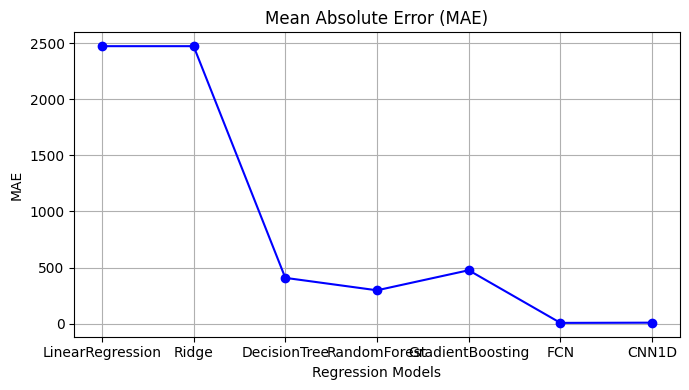

In [6]:
# Mean Absolute Error (MAE)
plt.figure(figsize=(7, 4))
plt.plot(models, mae, marker='o', color='blue')
plt.title("Mean Absolute Error (MAE)")
plt.xlabel("Regression Models")
plt.ylabel("MAE")
plt.grid(True)
plt.tight_layout()
plt.show()

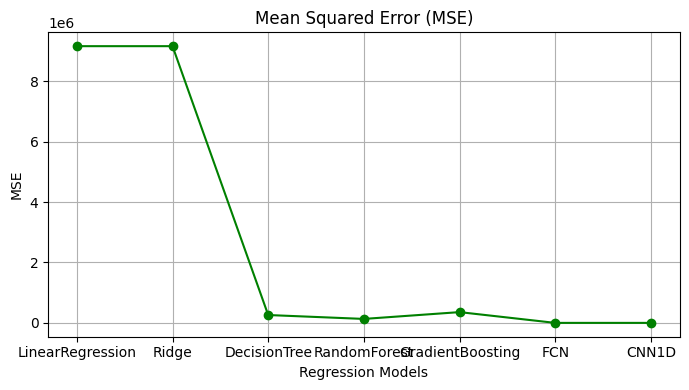

In [7]:
# Mean Squared Error (MSE)
plt.figure(figsize=(7, 4))
plt.plot(models, mse, marker='o', color='green')
plt.title("Mean Squared Error (MSE)")
plt.xlabel("Regression Models")
plt.ylabel("MSE")
plt.grid(True)
plt.tight_layout()
plt.show()

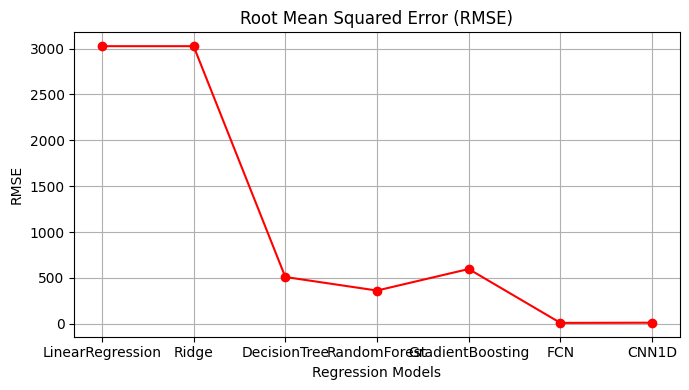

In [8]:
# Root Mean Squared Error (RMSE)
plt.figure(figsize=(7, 4))
plt.plot(models, rmse, marker='o', color='red')
plt.title("Root Mean Squared Error (RMSE)")
plt.xlabel("Regression Models")
plt.ylabel("RMSE")
plt.grid(True)
plt.tight_layout()
plt.show()

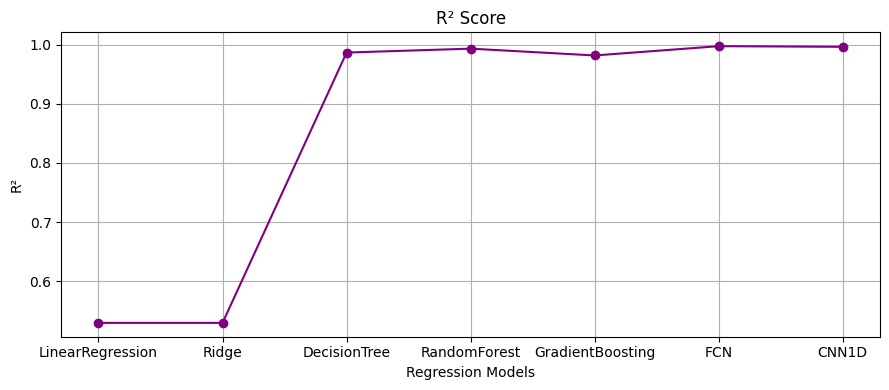

In [9]:
# R² Score
plt.figure(figsize=(9, 4))
plt.plot(models, r2, marker='o', color='purple')
plt.title("R² Score")
plt.xlabel("Regression Models")
plt.ylabel("R²")
plt.grid(True)
plt.tight_layout()
plt.show()